In [30]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os

sys.path.append("../stabilvol")
from utility import functions as f
from utility.classes.stability_analysis import StabilVolter

DATABASE = '../data/processed/trapezoidal_selection/stabilvol.sqlite'

In [13]:
print(os.getcwd())
os.path.exists(DATABASE)

g:\UNIPA\ECONOFISICA\stabilizing_volatility\notebooks


True

In [14]:
# Connect to the SQLite database
conn = sqlite3.connect(DATABASE)
cur = conn.cursor()

# Query the database to get all table names
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
table_names = cur.fetchall()
table_names = np.array([x[0] for x in table_names])
table_names.shape[0]

100

In [15]:
thresholds = f.list_database_thresholds('../data/processed/trapezoidal_selection/stabilvol.sqlite')

Start Threshold 	     End Thresholds      
       -2.0     	  -4.0   -3.0   -2.5   -2.2   -2.1   -1.9   -1.8   -1.5   -1.0    0.0 
       -1.0     	  -3.0   -2.0   -1.5   -1.2   -1.1   -0.9   -0.8   -0.5    0.0    1.0 
       -0.5     	  -2.5   -1.5   -1.0   -0.7   -0.6   -0.4   -0.3    0.0    0.5    1.5 
       -0.2     	  -2.2   -1.2   -0.7   -0.4   -0.3   -0.1    0.0    0.3    0.8    1.8 
       -0.1     	  -2.1   -1.1   -0.6   -0.3   -0.2    0.0    0.1    0.4    0.9    1.9 
        0.1     	  -1.9   -0.9   -0.4   -0.1    0.0    0.2    0.3    0.6    1.1    2.1 
        0.2     	  -1.8   -0.8   -0.3    0.0    0.1    0.3    0.4    0.7    1.2    2.2 
        0.5     	  -1.5   -0.5    0.0    0.3    0.4    0.6    0.7    1.0    1.5    2.5 
        1.0     	  -1.0    0.0    0.5    0.8    0.9    1.1    1.2    1.5    2.0    3.0 
        2.0     	   0.0    1.0    1.5    1.8    1.9    2.1    2.2    2.5    3.0    4.0 


In [ ]:
pd.DataFrame(thresholds, columns=['t1', 't2']).to_csv('data/processed/trapezoidal_selection/thresholds.csv', index=False)

In [21]:
thresholds.values

array([[-0.2, -2.2],
       [-0.1, -0.3],
       [-1. , -1.1],
       [-0.1, -2.1],
       [-2. , -2.5],
       [-1. , -2. ],
       [-0.5, -0.6],
       [-1. , -1.2],
       [-2. , -2.1],
       [-0.5, -1.5],
       [-0.2, -0.7],
       [-2. , -2.2],
       [-0.5, -0.7],
       [-2. , -3. ],
       [-1. , -3. ],
       [-0.1, -0.6],
       [-0.2, -0.3],
       [-0.5, -2.5],
       [-0.5, -1. ],
       [-0.1, -0.2],
       [-0.1, -1.1],
       [-0.2, -0.4],
       [-0.2, -1.2],
       [-1. , -1.5],
       [-2. , -4. ],
       [-0.2,  0. ],
       [-0.5,  0.5],
       [-0.5,  0. ],
       [-0.1,  1.9],
       [-1. , -0.8],
       [-0.1,  0.1],
       [-0.2,  1.8],
       [-2. , -1. ],
       [-0.2, -0.1],
       [-1. ,  1. ],
       [-1. , -0.9],
       [-0.1,  0. ],
       [-0.2,  0.3],
       [-0.2,  0.8],
       [-2. , -1.8],
       [-2. ,  0. ],
       [-1. ,  0. ],
       [-1. , -0.5],
       [-0.1,  0.9],
       [-0.1,  0.4],
       [-0.5, -0.3],
       [-0.5,  1.5],
       [-2. ,

0.2507375500428701
0.43257241574741584
0.3179792228702531
0.3665119288282918


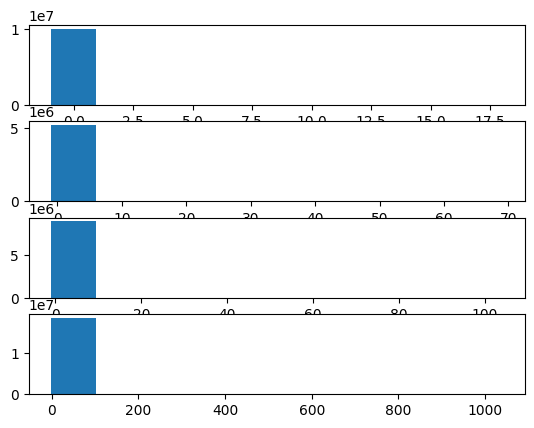

In [36]:
fig, axs = plt.subplots(4)
for i, market in enumerate(["UN", "UW", "LN", "JT"]):
    df = pd.read_pickle(f"../data/interim/{market}.pickle")
    data = df.melt()["value"].values
    print(0.1*df.std().mean()*100)
    axs[i].hist(data)
    

In [33]:
df

,4272,5631,5406,5803,6502,5563,1801,4901,4151,5401,...,5072,2985,7691,7690,7098,3456,4257,7139,7132,90001857
1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,-0.037267,0.096552,0.072727,0.051282,0.010582,0.097561,-0.023923,-0.010526,-0.007042,0.025210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-27,0.003617,0.034351,0.019868,0.005102,0.002988,0.031792,0.002427,0.018560,-0.003236,0.013284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-28,0.006306,-0.002013,0.025974,0.012690,0.006658,0.008403,0.006053,-0.000548,0.008117,0.006817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-29,-0.005372,0.030252,-0.003165,-0.020050,-0.033420,-0.019444,0.000000,-0.001234,-0.016103,0.008333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-30,-0.011701,-0.038173,-0.020635,-0.016624,-0.006843,-0.016997,0.016847,-0.001098,-0.001637,-0.019112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.melt()[df.melt()["value"] < 0]

,variable,value
4,4272,-0.037267
6,4272,-0.004107
7,4272,-0.016495
9,4272,-0.016260
12,4272,-0.027368
...,...,...
45930637,5033,-0.013648
45941726,9552,-0.064412
45974992,9553,-0.139651
45974993,9553,-0.034783
